In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages
from matplotlib.pyplot import cm # color stuff
from scipy.optimize import curve_fit
import itertools
plotmarkers=['^-', 'o-', 's-', '*-', 'd-', 'v-', 'h-', '>-', 'D-', 'H-', '<-', 'o-', 's-', '3-']
from scipy.optimize import curve_fit
import csv
%matplotlib inline


figsizeRanb=(5, 3.5)#(6,4) is default size in inches
plt.rcParams.update({'font.size': 11}) #default is 10

from matplotlib.ticker import AutoMinorLocator  #Stuff for ticks
minorLocator = AutoMinorLocator(2)

    
rootTP="/home/johann/Remote/imac"
rootTP2="/home/johann/Remote2"
rootMAC="/Users/jh"
root=rootMAC



In [17]:
def plotdata(dataArrs,xlabel,linelabels,linestyles='',noshow=False,addfig=False,loglog=False,legendloc=0,ncol=1,
             tofile=False,filename='test',fitexp=False,plotfit=False,ylim=[0,1.1],xlim=None,alph=0,nu=1.04):
    if addfig==False: fig, ax = plt.subplots(figsize=figsizeRanb)
    if linestyles=='': lslist = len(dataArrs) * ['o-']
    elif linestyles=='markers': lslist=plotmarkers
    else: lslist = linestyles
    for i,data in enumerate(dataArrs):
        dd0s=data[:,1]/6.
        xvals=data[:,0]
        if loglog==True:
            plt.loglog(xvals,np.abs(np.log(dd0s)),lslist[i],label=linelabels[i])
            plt.xlabel("$\log("+xlabel+")$")
            plt.ylabel("$\log(|\log(D/D_0)|)$")
            if alph!=0:# plot a line in the log-plot
                xs=np.linspace(xvals[0],xvals[-1],100)
                ys=alph*xs**nu
                plt.loglog(xs,ys,'k-')
        else:
            plt.plot(xvals,dd0s,lslist[i],label=linelabels[i])
            #plt.xlim([0,1])
            plt.xlabel(r'$'+xlabel+'$')
            plt.ylabel("$D/D_0$")
            if addfig==False:
                ax.xaxis.set_minor_locator(minorLocator)
                ax.yaxis.set_minor_locator(AutoMinorLocator(2))
            plt.locator_params(axis='x',nbins=7) #maximum number of xticks
        if fitexp:
            popt, pcov = curve_fit(stexp, xvals, dd0s,p0=[9,0.7],bounds=(0, [np.inf, np.inf]))
            print(linelabels[i],popt)
            if plotfit:
                xs = np.linspace(xvals[0],xvals[-1],100)
                ys = stexp(xs, *popt)
                plt.plot(xs,ys,'k-')
    plt.legend(ncol=ncol,loc=legendloc,fontsize = 'medium',frameon=False)
    plt.ylim(ylim)
    plt.xlim(xlim)
    #plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', ncol=1)
    if tofile==True:
        pp = PdfPages('figures/'+filename+'.pdf')
        pp.savefig(bbox_inches='tight')
        pp.close()
    if noshow==False:
        plt.show()

In [2]:
# Function to plot D over phi vary lub noLub data with fixed aop
Vcyl = lambda a, b: np.pi*b*(a/2.)**2
def phiOverlap(aob): # Old formula for phi for overlapping cylinders
    return (3*Vcyl(aob,b=1) - 8 * np.sqrt(2) * (aob/2.)**3)

def phiNoOverlap(aob): 
    return 3*Vcyl(aob,b=1) # This is almost the same formula as for the old model, but without the overlap term

def ptoPhiOverlap(aprel,aop,zeroa=False):
    if zeroa:
        prel=aprel/(1.+aop)
    return phiOverlap(prel*aop)

def ptoPhiNoOverlap(aprel,aop,zeroa=False):
    if zeroa:
        prel=aprel/(1.+aop)
    return phiNoOverlap(prel*aop)

def ptoPhiData(data,aop=0,zeroa=False,zerop=False):
    prels=data[:,0]
    if zeroa:
        prels/=(1.+aop)
    elif zerop:
        aop=1
    phis=phiOverlap(prels*aop)
    data[:,0]=phis

In [3]:
def plottofile(filename):
    pp = PdfPages('figures/'+filename+'.pdf')
    pp.savefig(bbox_inches='tight')
    pp.close()

## Some Notes:
#### The aim: Comparing Ranb D over phi data to fig.4 in our bpj paper.
In Johansson1991 some quantities for dextran are given as: 
- the partial specific volume $\nu_s=0.61$ mL/g
- the dextran diameter $a=7.4$ Angstrom
- the dextran mean residue length $l=3.9$ Angstrom

Using the former two quantities, we can calculate the dextran volume fraction $\phi$ from the weight volume percentage (g/mL x 100):
$$\phi = \frac{(w/v)\% \times \nu_s}{100} \;=\; (w/v)\% \times 0.0061$$

According to Jason and our previous papers, Alexa has a diameter of 14 to 15 Angstrom. Hence we obtain an $a/p$ ratio of:
- $a/p = 0.5$ *without* a water hydration layer and $(a+p)=(0.74+1.48)nm = 2.22nm$
- $a/p = \frac{7.4}{15+4} = 0.39$ *with* water hydration layer and $(a+p)=(0.74+1.88)nm = 2.62nm$

Maximal phi for Jason Data:  0.0488


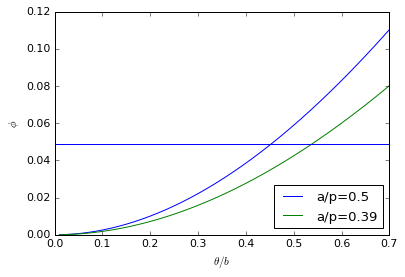

For a/p= 0.5 , the maximal value of is (a+p) = 0.4537
For a/p= 0.39 , the maximal value of is (a+p) = 0.539


In [4]:
print('Maximal phi for Jason Data: ',0.0061*8)

aop=0.5
aoph=0.39

ptest=np.arange(0.01,0.7,0.0001)
plt.plot(ptest,ptoPhiOverlap(ptest,aop,True),label='a/p='+str(aop))
plt.plot(ptest,ptoPhiOverlap(ptest,aoph,True),label='a/p='+str(aoph))
plt.axhline(0.049)
plt.legend(loc=4)
plt.xlabel(r'$\theta/b$')
plt.ylabel(r'$\phi$')
plt.xlim([0,0.7])
plt.show()

phiVals=ptoPhiOverlap(ptest,aop,True)
xint_i= (np.abs(phiVals-0.049)).argmin(0)
print("For a/p=",aop,", the maximal value of is (a+p) =", ptest[xint_i])

phiVals=ptoPhiOverlap(ptest,aoph,True)
xint_i= (np.abs(phiVals-0.049)).argmin(0)
print("For a/p=",aoph,", the maximal value of is (a+p) =", ptest[xint_i])

### Conclusion:
We determined maximal $\theta=(a+p)$ value for the polymer concentration interval interval of Jasons experiment for Alexa in charged Dextran (Fig.4 bpj). For $a/p=0.5$ *without* water hydration layer, and $a/p=0.75$ *with* water hydration layer:
- $a/p=0.5$: about $\theta/b=(a+p)/b=0.45b$
- $a/p=0.39$: about $\theta/b=(a+p)/b=0.54b$

#### Calculate all $a/b$ values from the $\phi$ values 
$$\phi \approx \frac{3V_{cyl}}{V_{box}} = 3\pi \left(\frac{a}{2b}\right)^2$$
$$\rightarrow a/b = 2 \sqrt{\phi/(3\pi)}$$

## Next step: Calculate corresponding range $k/p$

At 1 (w/v)% I have 6mM for dex- and 10 mM for dex+.
Hence, I get 

Cion- = (buffer) + (dextran-) = 10mM + (w/v)% x 6mM

Cion+ = (buffer) + (dextran+) = 10mM + (w/v)% x 10mM

where g/mol = mM = 10 x (w/v)%


#### And corrected U_0
In principle I would need to also adapt the interaction strength $U_0$. The interaction strenght for touching spheres should be similar for varying ion concentration. Hence, when $k/p$ decreases, I should increase $U_0$.
$$U_{01} e^{-\theta/(2k_1)} = U_{02} e^{-\theta/(2k_2)}$$
$$U_{02} = U_{01} e^{-\theta (1/(2k_1) - 1/(2k_2))}$$
$$\rightarrow U_{02} = U_{01} e^{-\theta (k_2 - k_1)/(2k_2k_1)}$$

In [48]:
def floatPrint(data): 
    np.set_printoptions(precision=3)
    print(data)
    np.set_printoptions(precision=8)

def aFromCdextran(Cdextran):
    "a/b is output. Needs Cdextran in g/L"
    phiDex = Cdextran*0.00061
    arel = 2*np.sqrt(phiDex/(3*np.pi))
    return arel

def bnmFromCdextran(Cdextran,anm):
    "a/b is output. Needs Cdextran in g/L"
    phiDex = Cdextran*0.00061
    bnm = anm/(2*np.sqrt(phiDex/(3*np.pi)))
    return bnm

Cvalues = np.arange(10,100,30)
aValues = aFromCdextran(Cvalues)
print("10*a/b values, independent of a/p:")
floatPrint(10*aValues)


def Unewk(Uk1,k1,k2,theta=1):
    "This function returns an adapted U_0 for changing interaction range k/p"
    Ufactor = np.exp(-theta*(k2-k1)/(2*k1*k2))
    Unew = Uk1 * Ufactor
    return Unew, Ufactor

def UnewList(Uk1,koplist):
    "This function takes a list of k/theta as the argument"
    return np.append(np.array([Uk1]),Unewk(Uk1,koplist[0],koplist[1:])[0])

10*a/b values, independent of a/p:
[ 0.509  1.018  1.346]


In [84]:
def kFromCion(Cion):
    "This function returns the interaction range k in nanometers for a certain Ion concentration in mM"
    return np.sqrt(0.0924*10**3/Cion)

def kFromCdextran(Cpoly):
    "This function returns the interaction range k in nanometers for a certain dextran Concentration in g/L"
    Cion_mM_Att = 10 + 10 * Cpoly/10.
    Cion_mM_Rep = 10 + 6  * Cpoly/10.
    #print("~~~~ NOTE ~~~~\n Using larger added Ionic strength for dextran\n~~~~~~~~~~~~")
    kAtt = kFromCion(Cion_mM_Att)
    kRep = kFromCion(Cion_mM_Rep)
    return kAtt, kRep

def koapFromCdextran(Cpoly,apsteric):
    "This function requires the dextran conc. in g/L and the steric interaction param. in nm to calc. k/(a+p)"
    kAtt, kRep = kFromCdextran(Cpoly)
    return kAtt/apsteric, kRep/apsteric

def krelbFromCdextran(Cpoly,anm):
    "This function requires the dextran conc. in g/L and the steric interaction param. in nm to calc. k/(a+p)"
    kAtt, kRep = kFromCdextran(Cpoly)
    return kAtt/bnmFromCdextran(Cpoly,anm), kRep/bnmFromCdextran(Cpoly,anm)

katt,krep=kFromCdextran(Cvalues)

np.set_printoptions(precision=3)
print("The absolute ranges k in nm:\n","kAtt =",katt,"\nkRep =",krep)
kAttrel, kReprel = krelbFromCdextran(Cvalues,0.74)
print("\nThe relative ranges k/b * 10 for a/p=0.5:\n","10*kAtt/b =",10*kAttrel,"\n10*kRep/b =",10*kReprel)
print("\nThe relative ranges k/p for a/p=0.39 are of course the same, since they only depend on the dextran diameter a_dex")

kAttop, kRepop = koapFromCdextran(Cvalues,2.22)
print("\nThe relative ranges k/steric for a/p=0.5:\n","kAtt/steric =",kAttop,"\nkRep/steric =",kRepop)
U01Att=-7
print("For U_01 =",U01Att,"the according corrected U_0 values are\n",UnewList(U01Att,kAttop))

kAttop, kRepop = koapFromCdextran(Cvalues,2.62)
print("\nThe relative ranges k/steric for a/p=0.39:\n","kAtt/steric =",kAttop,"\nkRep/steric =",kRepop)
U01Att=-8
print("For U_01 =",U01Att,"the according corrected U_0 values are\n",UnewList(U01Att,kAttop))
np.set_printoptions(precision=8)


The absolute ranges k in nm:
 kAtt = [ 2.149  1.359  1.075] 
kRep = [ 2.403  1.649  1.333]

The relative ranges k/b * 10 for a/p=0.5:
 10*kAtt/b = [ 1.478  1.869  1.955] 
10*kRep/b = [ 1.652  2.267  2.425]

The relative ranges k/p for a/p=0.39 are of course the same, since they only depend on the dextran diameter a_dex

The relative ranges k/steric for a/p=0.5:
 kAtt/steric = [ 0.968  0.612  0.484] 
kRep/steric = [ 1.082  0.743  0.6  ]
For U_01 = -7 the according corrected U_0 values are
 [ -7.     -9.45  -11.732]

The relative ranges k/steric for a/p=0.39:
 kAtt/steric = [ 0.82   0.519  0.41 ] 
kRep/steric = [ 0.917  0.629  0.509]
For U_01 = -8 the according corrected U_0 values are
 [ -8.    -11.4   -14.716]


#### Conclusion:
- We find that the interaction range becomes smaller for increasing dextran concentration, since the ion concentration increases simultaneously.

## Evaluation

In [89]:
bpj4data = np.asarray([
    [1,0.925982463,0.831748342,0.798491522,0.753185472,0.695878232,0.670772084,0.630941941,0.599834134],
    [1,0.883121743,0.807151296,0.709870951,0.661140049,0.635088743,0.580538736,0.543552391,0.505993318],
    [1,0.878550339,0.837911679,0.775459276,0.733041935,0.669907265,0.664030792,0.628555042,0.583068535],
    [1,0.074417946,0.108983059,0.146672764,0.143483107,0.153289683,0.152657178,0.164448086,0.17335864]
])
bpj4xvals = np.asarray([0,1,2,3,4,5,6,7,8])*0.0061  # *0.0061 to convert (w/v)% to phi
bpj4titles = ['Dextran20','Dextran500','Dextran(-)','Dextran(+)']

def ptoPhi(data,aop=0,zeroa=False,zerop=False):
    prels=data[:,0]
    if zeroa:
        prels/=(1.+aop)
    elif zerop:
        aop=1
    phis=phiOverlap(prels*aop)
    data[:,0]=phis

def getDop_u_aArr_kArr_aop_d(u,aArr,kArr,aop,d,dt='0.0001'):
    initfolder=root+"/Documents/workspace-cpp/RanbSPS/Release/sim_data/Jason/rand/d"+str(d)+"/fixb/dt"+dt+"/t200/"
    #tmpdatadir="/Users/jh/Documents/Remote_PC/yoshi_scratch/HI/sim/Release/sim_data/noreset/fitRPinv/steric/dt0.001tmp/t200"
    data = []
    for j, a in enumerate(aArr):
        u0=u
        if isinstance(u, (list, tuple, np.ndarray)):
            print(j)
            u0=u[j]
        adir="a"+str(a)
        p=a/aop
        pstr='%s' % float('%g' % p)
        pstr=pstr.rstrip('0').rstrip(".")
        a=(float(a)/10.)                 # make p value p/b
        p=p/10.
        if u==0:
            k='1.000'
        else:
            k="{0:.3f}".format(kArr[j])
        file=os.path.join(initfolder,adir,'p'+pstr,'k'+k,'u'+str(u0),'InstantValues/linear_fit_parametersMSD.txt')
        #print(file)
        if os.path.isfile(file):
            #print(file)
            with open(file, 'r') as fitf:
                m = (fitf.readline().split('m')[1]).split()[0]
            data.append([float(p),float(m)]) #the [:-1] serves to cut the linebreak '\n' from the string m.
        else: print("Error! Missing file\n",file)
    return (np.array(sorted(data)))

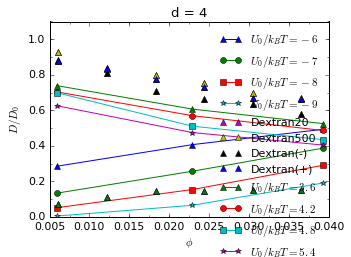

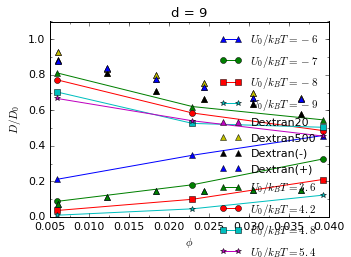

In [99]:
# Evaluate comparison to Jasons data for different fixed U_0 
def quickplotford(d,aArr,kArr,uArr,aop,noshow=False,addfig=False):
    dataArr=[getDop_u_aArr_kArr_aop_d(u,aArr,kArr,aop=aop,d=d) for u in uArr]
    titleArr = ['$U_0/k_BT = '+str(u)+'$' for u in uArr]
    #plotdata(dataArr,r'p/b',lineArr=titleArr)
    for data in dataArr:
        ptoPhi(data,aop,False)
    plotdata(dataArr,'\phi',titleArr,linestyles='markers',loglog=False,tofile=False,filename='TODO',
             xlim=None, fitexp=False,plotfit=False,noshow=True,addfig=addfig)
    for i,exdat in enumerate(bpj4data):
        ti = bpj4titles[i]
        dd0 = exdat[:]
        cpoly = bpj4xvals
        plt.plot(cpoly,dd0,'^',label=ti)
    plt.title("d = "+str(d))
    if noshow: return
    plt.show()

aop=0.5
aArr=[0.509 , 1.018 , 1.346]
kArr=[ 1.478, 1.869, 1.955] 
kRep=[1.652 , 2.267 , 2.425]
uAttLines=[-6,-7,-8,-9]
uRepLines=[3.6, 4.2, 4.8, 5.4]
quickplotford(4,aArr,kArr,uAttLines,aop,noshow=True)
quickplotford(4,aArr,kRep,uRepLines,aop,addfig=True)
quickplotford(9,aArr,kArr,uAttLines,aop,noshow=True)
quickplotford(9,aArr,kRep,uRepLines,aop,addfig=True)
#quickplotford(6,aArr,kArr,uLines,aop)
#quickplotford(9,aArr,kArr,uLines,aop)

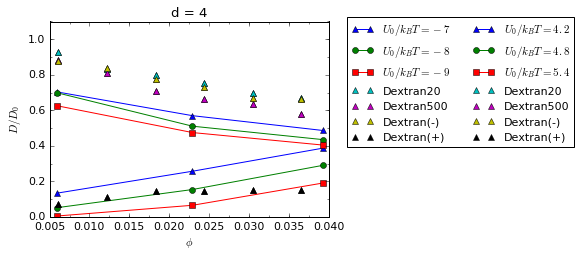

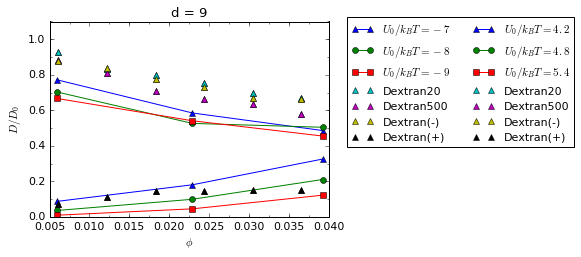

In [105]:
aop=0.5
aArr=[0.509 , 1.018 , 1.346]
kArr=[ 1.478, 1.869, 1.955] 
kRep=[1.652 , 2.267 , 2.425]
uAttLines=[-7,-8,-9]
uRepLines=[4.2, 4.8, 5.4]
quickplotford(4,aArr,kArr,uAttLines,aop,noshow=True)
quickplotford(4,aArr,kRep,uRepLines,aop,addfig=True,noshow=True)
plt.legend(bbox_to_anchor=(1.9, 1.05),ncol=2,fontsize = 'medium')
plt.show()

aop=0.5
aArr=[0.509 , 1.018 , 1.346]
kArr=[ 1.478, 1.869, 1.955] 
kRep=[1.652 , 2.267 , 2.425]
uAttLines=[-7,-8,-9]
uRepLines=[4.2, 4.8, 5.4]
quickplotford(9,aArr,kArr,uAttLines,aop,noshow=True)
quickplotford(9,aArr,kRep,uRepLines,aop,addfig=True,noshow=True)
plt.legend(bbox_to_anchor=(1.9, 1.05),ncol=2,fontsize = 'medium')
plt.show()

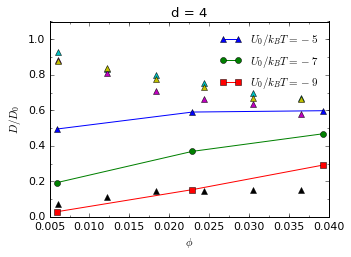

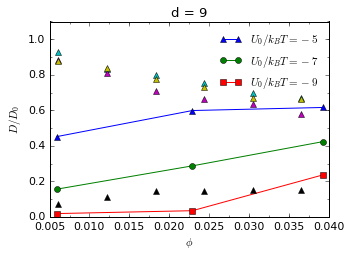

In [93]:
####   a/p=0.39
aop=0.39
aArr=[0.509 , 1.018 , 1.346]
kArr=[ 1.478, 1.869, 1.955] 
uLines=[-5,-7,-9]
quickplotford(4,aArr,kArr,uLines,aop)
quickplotford(9,aArr,kArr,uLines,aop)

#### Now we adapt the potential strength, too

In [74]:
# Evaluate comparison to Jasons data for different fixed U_0 
def quickplotforVarU(d,aArr,kArr,uArr,aop):
    dataArr=[getDop_u_aArr_kArr_aop_d(uArr,aArr,kArr,aop=aop,d=d)]
    titleArr=['test']
    #plotdata(dataArr,r'p/b',lineArr=titleArr)
    for data in dataArr:
        ptoPhi(data,aop,False)
    plotdata(dataArr,'\phi',titleArr,linestyles='markers',loglog=False,tofile=True,filename='TODO',
             xlim=None, fitexp=False,plotfit=False,noshow=True)
    for i,exdat in enumerate(bpj4data):
            ti = bpj4titles[i]
            dd0 = exdat[:]
            cpoly = bpj4xvals
            plt.plot(cpoly,dd0,'^',label=ti)
            plt.title("d = "+str(d))
    plt.show()

[-7, -9.45, -11.732]
0
[-7, -9.45, -11.732]
1
[-7, -9.45, -11.732]
2


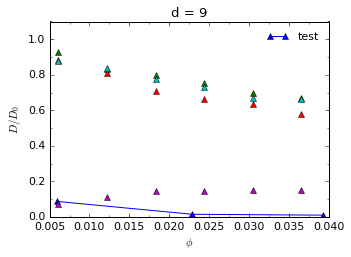

In [83]:
aop=0.5
aArr=[0.509 , 1.018 , 1.346]
kArr=[ 1.478, 1.869, 1.955] 
uArr=[-7,-9.45, -11.732]
quickplotforVarU(9,aArr,kArr,uArr,aop)

In [ ]:
-8.    -11.4   -14.716

### Using a different mM ionic strength per added dextran

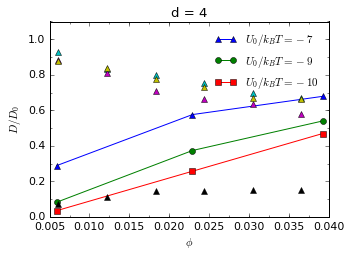

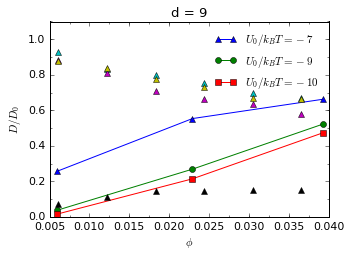

In [57]:
aop=0.5
aArr=[0.509 , 1.018 , 1.346]
kArr=[ 1.207, 1.393 , 1.428] 
uArr=[-7,-9,-10]
quickplotford(4,aArr,kArr,uLines,aop)
quickplotford(9,aArr,kArr,uLines,aop)

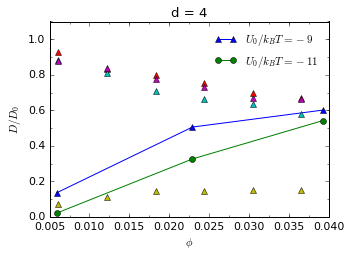

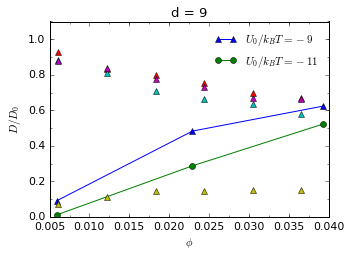

In [58]:
aop=0.39
aArr=[0.509 , 1.018 , 1.346]
kArr=[ 1.207, 1.393 , 1.428] 
uArr=[-9,-11]
quickplotford(4,aArr,kArr,uLines,aop)
quickplotford(9,aArr,kArr,uLines,aop)